In [1]:
import FdsPy.qe.myqengine as qe

univ = qe.IdUniverse(['DUMMY'])
freq = 'M'
ts = qe.TimeSeries(start_date = '-50Y',end_date = '0M',frequency=freq,calendar = 'NAY')

data_dict = {
            "us_3M_yld":f'SPEC_ID_DATA("TRYUS3M-FDS:FG_YIELD",#DATE,#DATE,{freq},NONE,NONE,2)',
            "us_6M_yld":f'SPEC_ID_DATA("TRYUS6M-FDS:FG_YIELD",#DATE,#DATE,{freq},NONE,NONE,2)',
            "us_1y_yld":f'SPEC_ID_DATA("TRYUS1Y-FDS:FG_YIELD",#DATE,#DATE,{freq},NONE,NONE,2)',
            "us_3y_yld":f'SPEC_ID_DATA("TRYUS3Y-FDS:FG_YIELD",#DATE,#DATE,{freq},NONE,NONE,2)',
            "us_5y_yld":f'SPEC_ID_DATA("TRYUS5Y-FDS:FG_YIELD",#DATE,#DATE,{freq},NONE,NONE,2)',
            "us_7y_yld":f'SPEC_ID_DATA("TRYUS7Y-FDS:FG_YIELD",#DATE,#DATE,{freq},NONE,NONE,2)',
            "us_10y_yld":f'SPEC_ID_DATA("TRYUS10Y-FDS:FG_YIELD",#DATE,#DATE,{freq},NONE,NONE,2)',
            }

req = qe.Calculation(universe = univ,dates =ts,data_dict=data_dict,source = 'FqlExpression')

req.query()

req.data

,DATE,UNIVERSE,us_3M_yld,us_6M_yld,us_1y_yld,us_3y_yld,us_5y_yld,us_7y_yld,us_10y_yld
0,19721229,DUMMY,5.1400,5.3900,5.6800,6.1400,6.2600,6.2900,6.4100
1,19730131,DUMMY,5.6800,5.8400,6.0900,6.4400,6.4500,6.4300,6.5400
2,19730228,DUMMY,5.8500,6.1200,6.4300,6.7400,6.7300,6.6800,6.6400
3,19730330,DUMMY,6.4000,6.7700,7.0900,6.8900,6.8100,6.7600,6.7300
4,19730430,DUMMY,6.2300,6.5400,6.8000,6.8100,6.7300,6.7500,6.7000
...,...,...,...,...,...,...,...,...,...
604,20230428,DUMMY,5.0743,5.0440,4.7848,3.7834,3.5361,3.5000,3.4475
605,20230531,DUMMY,5.4119,5.4333,5.1859,4.0494,3.7477,3.6938,3.6350
606,20230630,DUMMY,5.3149,5.4568,5.4151,4.4899,4.1293,3.9719,3.8102
607,20230731,DUMMY,5.4209,5.4774,5.3873,4.5194,4.1862,4.0699,3.9538


In [2]:
import pandas as pd
df = req.data
df = df.drop(columns = ['UNIVERSE'])
df['DATE'] = pd.to_datetime(df['DATE'])
df=df.set_index('DATE')

In [5]:
import pandas as pd
df.to_pickle('../../data/misc/us_benchmark_monthly_yields_20230920.pkl')
#df = pd.read_pickle('../../data/misc/us_benchmark_monthly_yields_20230920.pkl')

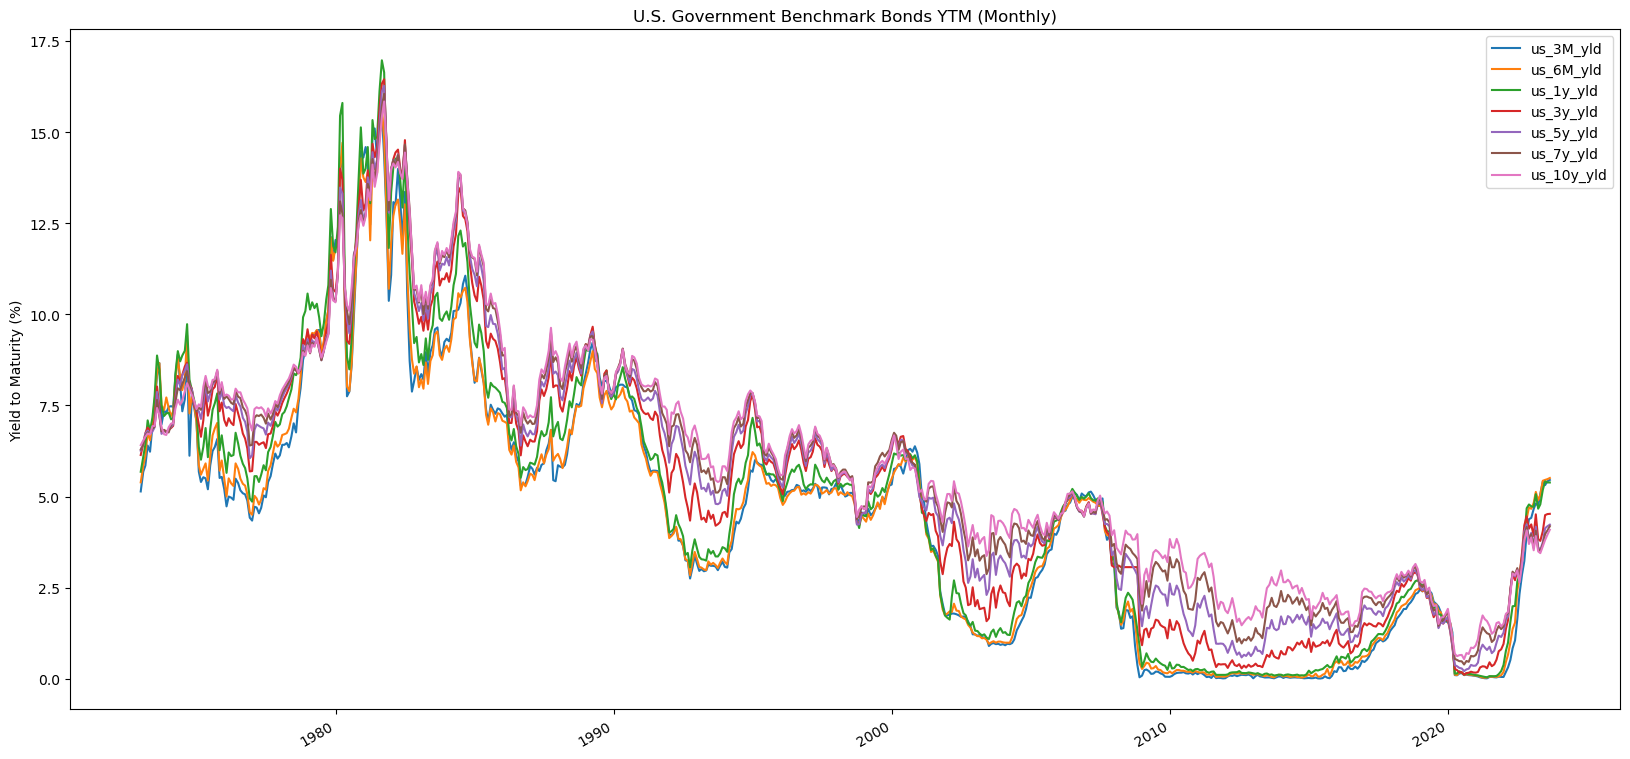

In [12]:
import matplotlib.pyplot as plt
import datetime

df.plot(figsize = (20,10))
plt.ylabel('Yield to Maturity (%)')
plt.xlabel('')
plt.title('U.S. Government Benchmark Bonds Yields (Monthly)')
plt.show()

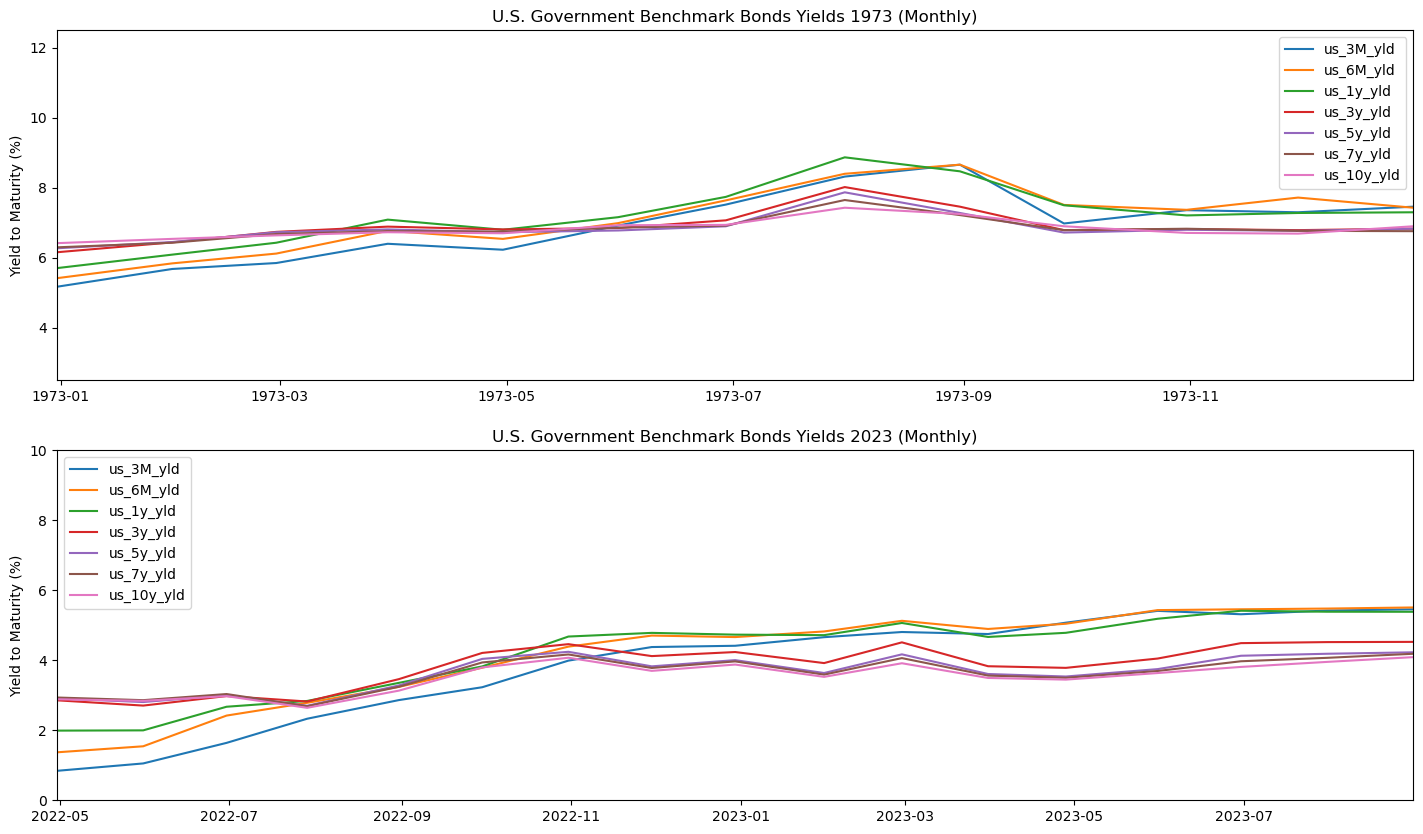

In [17]:
fig,axs = plt.subplots(2,1,figsize = (17.5,10))
axs[0].plot(df)
axs[0].set_xlim(datetime.datetime(1972, 12, 31), datetime.datetime(1973, 12, 31))
axs[0].set_ylim(2.5,12.5)
axs[0].legend(df.columns)
axs[0].set_title('U.S. Government Benchmark Bonds Yields 1973 (Monthly)')
axs[0].set_ylabel('Yield to Maturity (%)')

axs[1].plot(df)
axs[1].set_xlim(datetime.datetime(2022, 4, 30), datetime.datetime(2023, 8, 31))
axs[1].set_ylim(0,10)
axs[1].legend(df.columns)
axs[1].set_ylabel('Yield to Maturity (%)')
axs[1].set_title('U.S. Government Benchmark Bonds Yields 2022-2023 (Monthly)')
plt.show()

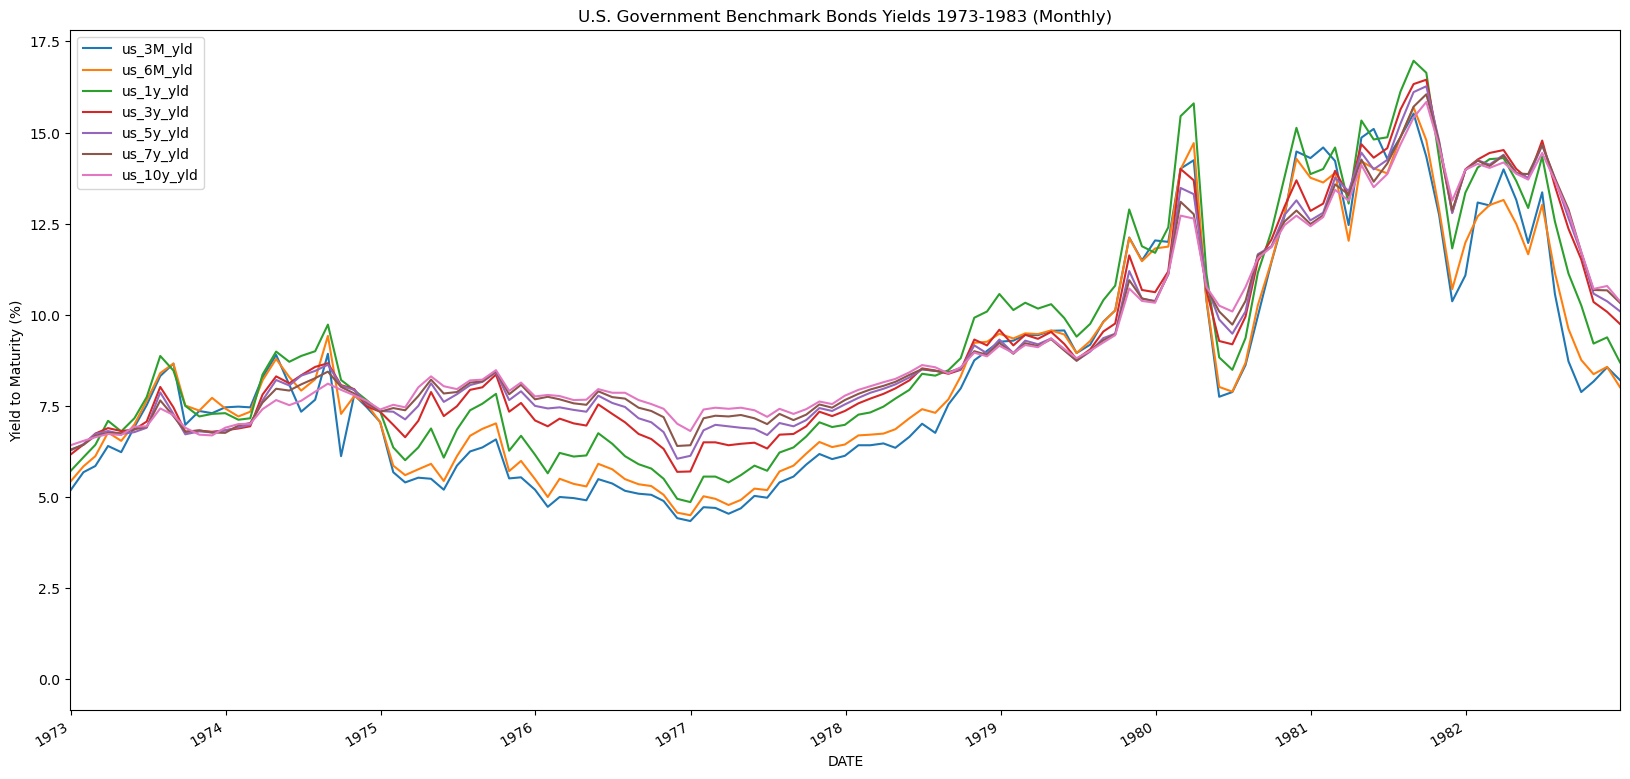

In [18]:
df.plot(figsize = (20,10))
plt.xlim(datetime.datetime(1972, 12, 31), datetime.datetime(1982, 12, 31))
plt.ylabel('Yield to Maturity (%)')
plt.title('U.S. Government Benchmark Bonds Yields 1973-1983 (Monthly)')
plt.show()

In [6]:
import FdsPy.qe.myqengine as qe
univ = qe.IdUniverse(['991000','984000','LHMN0001'])
start_date = '1973231'
ts = qe.TimeSeries(start_date = start_date,end_date = '19841231',frequency='M')
req = qe.Calculation(universe = univ, dates = ts, data_dict = {'price':'FG_PRICE(#DATE)'},source='FqlExpression')
req.query()
df = req.data.set_index(['DATE','UNIVERSE'])
df

price
DATE     UNIVERSE         
19730831 991000    119.608
         984000    108.823
         LHMN0001      NaN
19730928 991000    121.889
         984000    112.524
...                    ...
19841130 984000    154.698
         LHMN0001   94.010
19841231 991000    252.848
         984000    158.006
         LHMN0001   94.350

[411 rows x 1 columns]

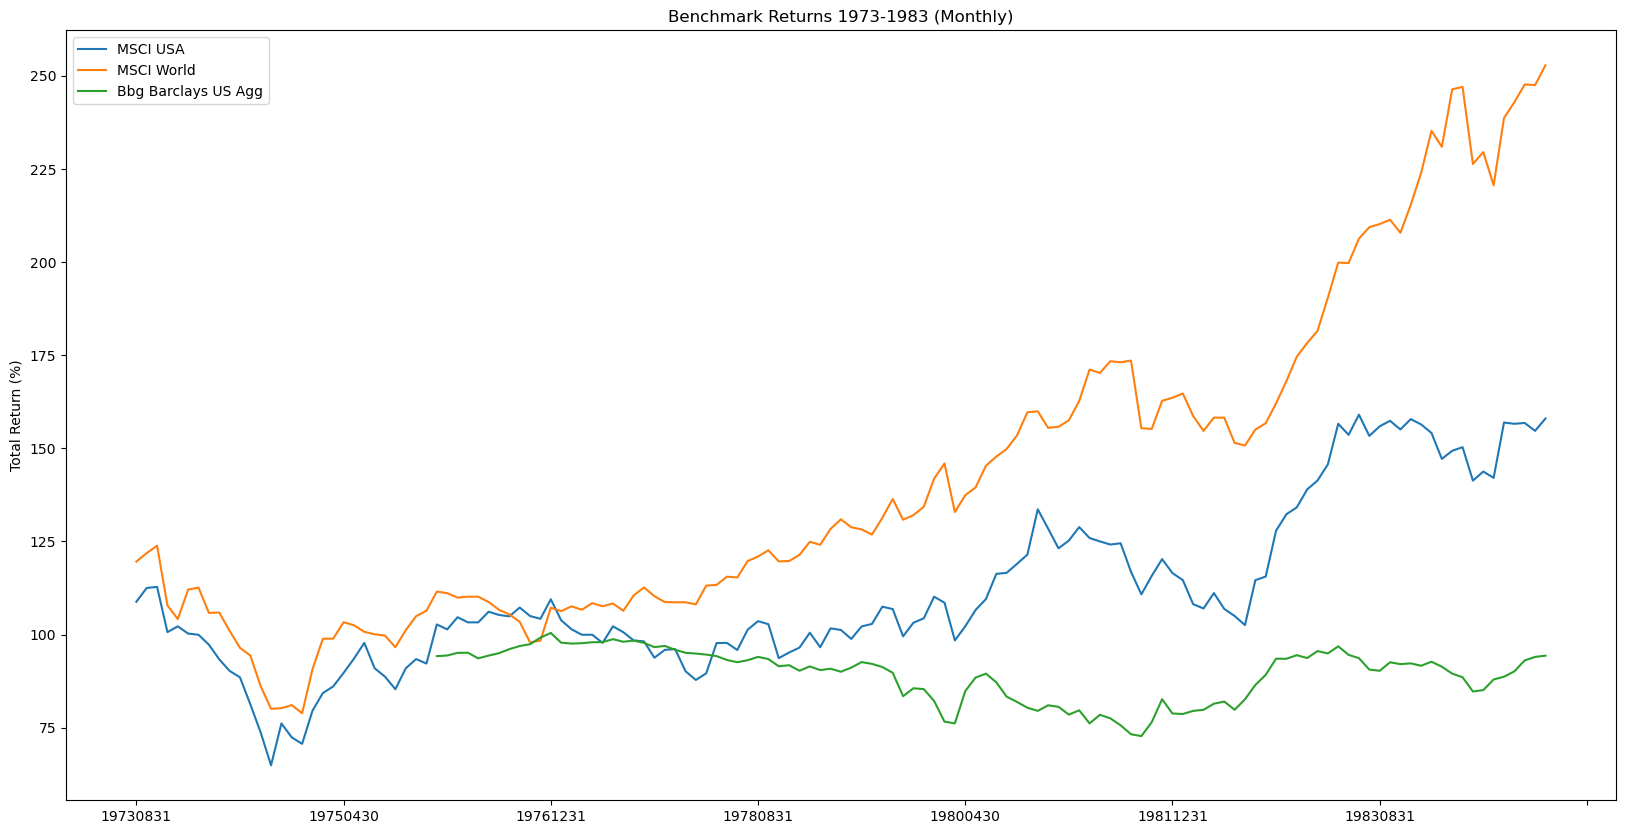

In [13]:
import matplotlib.pyplot as plt
df['price'].unstack().ffill().plot(figsize = (20,10))
plt.legend(['MSCI USA','MSCI World','Bbg Barclays US Agg'])
plt.ylabel('Total Return (%)')
plt.xlabel('')
plt.title('Benchmark Returns 1973-1983 (Monthly)')
plt.show()

In [15]:
df.to_csv('../../../data/misc/benchmark_returns_m_20230920.csv')